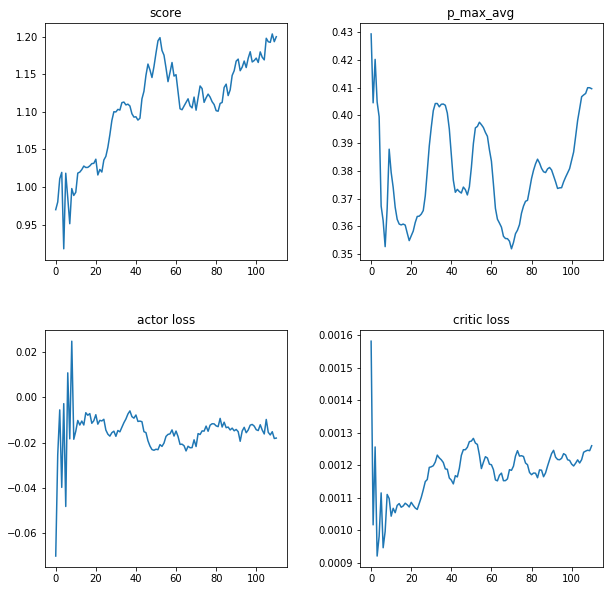

In [154]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def smooth(l):
    if len(l) < 10:
        return l
    tmp = []
    for i in range(len(l)):
        tmp.append(l[i])
        if i == 8:
            break
    for i in range(9, len(l)):
        tmp.append(sum(l[i-9:i+1])/10)
    l = tmp
    return l

df = pd.read_csv('output.csv', skiprows=0)
a = np.array(df)
index = a[:, 0]
episode = a[:, 1]
score = smooth(a[:, 2])
pmax = smooth(a[:, 3])
al = smooth(a[:, 4])
cl = smooth(a[:, 5])
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0].set_title('score')
axes[0][0].plot(index, score)
axes[0][1].set_title('p_max_avg')
axes[0][1].plot(index, pmax)
axes[1][0].set_title('actor loss')
axes[1][0].plot(index, al)
axes[1][1].set_title('critic loss')
axes[1][1].plot(index, cl)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
fig.savefig('./statistics.png')
plt.close()


